In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv('C:/Users/onebe/태림산업 설비데이터(24.01.01~24.05.14)/df_2040.csv', encoding='UTF-8')

df

,샤프트바코드,OP20판정,OP20전장하한,OP20전장상한,OP20전장,OP20거리하한,OP20거리상한,OP20거리,OP20캡간하한,OP20캡간상한,...,OP40STTA1CCW최소,OP40STTA1CCW최대,OP40STTA2합부,OP40STTA2CW최소,OP40STTA2CW최대,OP40STTA2CCW최소,OP40STTA2CCW최대,OP40S씰검사합부,OP40S탭검사합부,OP40S전류최대
0,A021N566RA 259213 S6562A 231221,1.0,-125.0,125.0,114.943,-0.15,0.15,-0.049,38.4,39.0,...,0.030,0.040,1,0.068,0.088,0.047,0.077,1,1,0.606
1,A021N566RA 259213 S6615A 231221,1.0,-125.0,125.0,114.840,-0.15,0.15,-0.024,38.4,39.0,...,0.059,0.090,1,0.048,0.077,0.037,0.057,1,1,0.601
2,A021N566RA 259213 S6605A 231221,1.0,-125.0,125.0,114.635,-0.15,0.15,-0.032,38.4,39.0,...,0.070,0.100,1,0.058,0.102,0.047,0.067,1,1,0.599
3,A021N566RA 259213 S6603A 231221,1.0,-125.0,125.0,115.148,-0.15,0.15,-0.022,38.4,39.0,...,0.049,0.059,1,0.048,0.068,0.027,0.047,1,1,0.595
4,A021N566RA 259213 S6602A 231221,1.0,-125.0,125.0,114.943,-0.15,0.15,-0.043,38.4,39.0,...,0.031,0.050,1,0.048,0.078,0.047,0.067,1,1,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,A021N565RB 259213 S5882B 240430,1.0,-125.0,125.0,117.611,-0.15,0.15,-0.050,38.4,39.0,...,0.067,0.088,1,0.003,0.047,0.007,0.037,1,1,0.549
200115,A021N565RB 259213 S5726B 240430,1.0,-125.0,125.0,117.098,-0.15,0.15,-0.050,38.4,39.0,...,0.088,0.098,1,0.003,0.039,0.007,0.027,1,1,0.551
200116,A021N565RB 259213 S5763B 240430,1.0,-125.0,125.0,116.892,-0.15,0.15,-0.050,38.4,39.0,...,0.077,0.108,1,0.003,0.039,0.007,0.037,1,1,0.550
200117,A021N565RB 259213 S6036B 240430,1.0,-125.0,125.0,117.200,-0.15,0.15,-0.050,38.4,39.0,...,0.118,0.138,1,0.030,0.039,0.030,0.037,1,1,0.550


In [2]:
df['OP40S판정'].value_counts()

1    195694
0      4425
Name: OP40S판정, dtype: int64

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 로드

x = df[["OP20전장", "OP20거리", "OP20캡간", "OP20좌1차피크", "OP20좌완료거리", "OP20우1차피크", "OP20우완료거리"]]
y = df['OP40S판정']

In [9]:
from imblearn.combine import SMOTETomek


smote_tomek = SMOTETomek(random_state=42)


x_resampled, y_resampled = smote_tomek.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
y_resampled.value_counts()

1    191824
0    191824
Name: OP40S판정, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


#Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}

# 모델 훈련
model = RandomForestClassifier(random_state=42,criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2,
                               n_estimators= 200)
model.fit(x_train, y_train)

# 모델 평가
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     38288
           1       0.98      0.99      0.98     38442

    accuracy                           0.98     76730
   macro avg       0.98      0.98      0.98     76730
weighted avg       0.98      0.98      0.98     76730



In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[37416,   872],
       [  326, 38116]], dtype=int64)

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV


# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'n_estimators': [100, 200, 300]  # 트리 개수 추가
# }

# model = RandomForestClassifier(random_state=42)

# # 그리드 서치 수행 (교차 검증 포함)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
# grid_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
import joblib

#모델 저장
joblib.dump((model), '20test.joblib')

['20test.joblib']

In [14]:
# 합격률 예측
probabilities = model.predict_proba(x_test)

# 합격률 추출
class_1_probability = probabilities[:, 1]

In [15]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
# result.to_csv('test20_result.csv',index=False,encoding='UTF-8')

# 2030to40

In [16]:
df2030 = df[["OP20전장", "OP20거리", "OP20캡간", "OP20좌1차피크", "OP20좌완료거리", "OP20우1차피크", "OP20우완료거리", 
             "OP30전장", "OP30거리", "OP30캡간", "OP30좌1차피크", "OP30좌완료거리", "OP30우1차피크", "OP30우완료거리",'OP40S판정']]
df2030

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP30전장,OP30거리,OP30캡간,OP30좌1차피크,OP30좌완료거리,OP30우1차피크,OP30우완료거리,OP40S판정
0,114.943,-0.049,38.858,376.184,10.35,400.346,10.26,124.007,0.026,38.586,246.032,11.21,263.332,11.213,1
1,114.840,-0.024,38.858,347.386,10.35,406.066,10.26,124.007,0.019,38.586,268.726,11.21,313.390,11.213,1
2,114.635,-0.032,38.858,400.149,10.35,438.908,10.26,124.007,0.018,38.586,252.544,11.21,253.465,11.213,1
3,115.148,-0.022,38.858,399.360,10.35,372.633,10.26,124.106,0.019,38.586,253.465,11.21,260.833,11.213,1
4,114.943,-0.043,38.858,359.221,10.35,364.941,10.26,124.007,0.019,38.586,280.040,11.21,269.055,11.213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,117.611,-0.050,38.778,390.484,10.35,322.237,10.26,124.106,0.004,38.500,272.607,11.10,265.437,11.097,1
200115,117.098,-0.050,38.778,377.367,10.35,351.232,10.26,124.106,0.017,38.500,250.176,11.10,274.252,11.097,1
200116,116.892,-0.050,38.778,378.156,10.35,358.037,10.26,124.106,0.023,38.500,239.389,11.10,266.753,11.097,1
200117,117.200,-0.050,38.778,418.789,10.35,369.675,10.26,124.106,0.018,38.500,274.515,11.10,251.426,11.097,1


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 로드

x2030 = df[["OP20전장", "OP20거리", "OP20캡간", "OP20좌1차피크", "OP20좌완료거리", "OP20우1차피크", "OP20우완료거리",
           "OP30전장", "OP30거리", "OP30캡간", "OP30좌1차피크", "OP30좌완료거리", "OP30우1차피크", "OP30우완료거리"]]
y2030 = df['OP40S판정']

print(x2030.shape)
print(y2030.shape)

(200119, 14)
(200119,)


In [18]:
from imblearn.combine import SMOTETomek


smote_tomek = SMOTETomek(random_state=42)


x2030_resampled, y2030_resampled = smote_tomek.fit_resample(x2030, y2030)

x_train2030, x_test2030, y_train2030, y_test2030 = train_test_split(x2030_resampled, y2030_resampled, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


# 모델 훈련
model2030 = RandomForestClassifier(random_state=42,criterion= 'entropy', max_depth= None, max_features= 'log2', n_estimators= 200)
model2030.fit(x_train2030, y_train2030)

# 모델 평가
y_pred2030 = model2030.predict(x_test2030)
print(classification_report(y_test2030, y_pred2030))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     38963
           1       0.98      1.00      0.99     39022

    accuracy                           0.99     77985
   macro avg       0.99      0.99      0.99     77985
weighted avg       0.99      0.99      0.99     77985



In [20]:
conf_matrix2030 = confusion_matrix(y_test2030, y_pred2030)

conf_matrix2030

array([[38195,   768],
       [  125, 38897]], dtype=int64)

In [21]:
import joblib

#모델 저장
joblib.dump((model2030), '2030test.joblib')

['2030test.joblib']

# 솔루션 도출해보기

In [33]:
x_test

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정,pred
78757,0.000000,-0.05,38.448000,341.173000,10.35,332.494000,10.260000,1,1
62010,116.892000,-0.05,38.508000,376.184000,10.35,406.264000,10.260000,1,1
365221,119.427285,-0.05,38.718569,375.612316,10.35,323.251862,10.260000,0,0
113128,119.458000,-0.05,38.558000,413.562000,10.35,460.407000,10.260000,1,1
20237,0.000000,-0.05,38.808000,428.059000,10.35,430.722000,10.260000,1,1
...,...,...,...,...,...,...,...,...,...
278609,119.003274,-0.05,38.706036,416.630460,10.35,333.725402,10.260000,0,0
279962,116.881504,-0.05,38.600816,398.857019,10.35,435.927312,10.261331,0,0
230033,116.814608,-0.05,38.508000,421.066712,10.35,440.331473,10.260000,0,0
96087,117.200000,-0.05,38.444000,442.359000,10.35,362.179000,10.263000,1,1


In [29]:
y_test

78757     1
62010     1
365221    0
113128    1
20237     1
         ..
278609    0
279962    0
230033    0
96087     1
247713    0
Name: OP40S판정, Length: 76730, dtype: int64

In [30]:
result = x_test
result

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
78757,0.000000,-0.05,38.448000,341.173000,10.35,332.494000,10.260000
62010,116.892000,-0.05,38.508000,376.184000,10.35,406.264000,10.260000
365221,119.427285,-0.05,38.718569,375.612316,10.35,323.251862,10.260000
113128,119.458000,-0.05,38.558000,413.562000,10.35,460.407000,10.260000
20237,0.000000,-0.05,38.808000,428.059000,10.35,430.722000,10.260000
...,...,...,...,...,...,...,...
278609,119.003274,-0.05,38.706036,416.630460,10.35,333.725402,10.260000
279962,116.881504,-0.05,38.600816,398.857019,10.35,435.927312,10.261331
230033,116.814608,-0.05,38.508000,421.066712,10.35,440.331473,10.260000
96087,117.200000,-0.05,38.444000,442.359000,10.35,362.179000,10.263000


In [31]:
result['OP40판정'] = y_test
result

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정
78757,0.000000,-0.05,38.448000,341.173000,10.35,332.494000,10.260000,1
62010,116.892000,-0.05,38.508000,376.184000,10.35,406.264000,10.260000,1
365221,119.427285,-0.05,38.718569,375.612316,10.35,323.251862,10.260000,0
113128,119.458000,-0.05,38.558000,413.562000,10.35,460.407000,10.260000,1
20237,0.000000,-0.05,38.808000,428.059000,10.35,430.722000,10.260000,1
...,...,...,...,...,...,...,...,...
278609,119.003274,-0.05,38.706036,416.630460,10.35,333.725402,10.260000,0
279962,116.881504,-0.05,38.600816,398.857019,10.35,435.927312,10.261331,0
230033,116.814608,-0.05,38.508000,421.066712,10.35,440.331473,10.260000,0
96087,117.200000,-0.05,38.444000,442.359000,10.35,362.179000,10.263000,1


In [32]:
result['pred']=y_pred
result

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정,pred
78757,0.000000,-0.05,38.448000,341.173000,10.35,332.494000,10.260000,1,1
62010,116.892000,-0.05,38.508000,376.184000,10.35,406.264000,10.260000,1,1
365221,119.427285,-0.05,38.718569,375.612316,10.35,323.251862,10.260000,0,0
113128,119.458000,-0.05,38.558000,413.562000,10.35,460.407000,10.260000,1,1
20237,0.000000,-0.05,38.808000,428.059000,10.35,430.722000,10.260000,1,1
...,...,...,...,...,...,...,...,...,...
278609,119.003274,-0.05,38.706036,416.630460,10.35,333.725402,10.260000,0,0
279962,116.881504,-0.05,38.600816,398.857019,10.35,435.927312,10.261331,0,0
230033,116.814608,-0.05,38.508000,421.066712,10.35,440.331473,10.260000,0,0
96087,117.200000,-0.05,38.444000,442.359000,10.35,362.179000,10.263000,1,1


In [34]:
result_0 = result[result['pred']==0]
result_0

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정,pred
365221,119.427285,-0.05,38.718569,375.612316,10.350000,323.251862,10.260000,0,0
298091,116.352173,-0.05,38.669030,357.218722,10.350000,346.710911,10.261369,0,0
196935,117.391748,-0.05,38.551783,360.623843,10.351132,341.416487,10.260000,0,0
310418,116.520067,-0.05,38.502698,365.308507,10.350000,421.262786,10.260000,0,0
313439,116.883805,-0.05,38.453576,455.912394,10.350020,478.871129,10.260000,0,0
...,...,...,...,...,...,...,...,...,...
301762,116.954562,-0.05,38.563403,400.440606,10.350000,397.291534,10.260000,0,0
353081,116.340427,-0.05,38.603047,358.288447,10.350000,378.156000,10.260000,0,0
278609,119.003274,-0.05,38.706036,416.630460,10.350000,333.725402,10.260000,0,0
279962,116.881504,-0.05,38.600816,398.857019,10.350000,435.927312,10.261331,0,0


## 모든 test데이터에 SHAP달아서 확인해보기

In [36]:
import pandas as pd
import shap


# 모델을 사용하여 TreeExplainer 생성
explainer = shap.TreeExplainer(model)

# 모든 샘플에 대한 SHAP 값을 계산
shap_values = explainer.shap_values(result, approximate=True)

# 이진 분류인 경우 클래스 1에 대한 SHAP 값 선택
shap_values_class1 = shap_values[1]

# 각 샘플에 대해 원래 값과 SHAP 값을 결합
shap_enhanced_df_list = []
for i in range(len(result)):
    sample_shap_values = shap_values_class1[i]
    enhanced_sample = {
        col: f"{val} / SHAP {shap_val:.7f}" for col, val, shap_val in zip(result.columns, result.iloc[i], sample_shap_values)
    }
    shap_enhanced_df_list.append(enhanced_sample)

# 최종 데이터프레임 생성
shap_enhanced_df = pd.DataFrame(shap_enhanced_df_list)

# 데이터프레임 출력
print(shap_enhanced_df)

                                     OP20전장                   OP20거리  \
0                      0.0 / SHAP 0.0292779  -0.05 / SHAP -0.0001901   
1                  116.892 / SHAP 0.0351918  -0.05 / SHAP -0.0028275   
2      119.42728529304433 / SHAP -0.1075017  -0.05 / SHAP -0.0142974   
3                  119.458 / SHAP 0.2579782  -0.05 / SHAP -0.0041388   
4                      0.0 / SHAP 0.2939491  -0.05 / SHAP -0.0372320   
...                                     ...                      ...   
76725   119.0032741719588 / SHAP -0.0813429  -0.05 / SHAP -0.0146719   
76726  116.88150442158795 / SHAP -0.0527300  -0.05 / SHAP -0.0036276   
76727  116.81460754690494 / SHAP -0.5571859   -0.05 / SHAP 0.0022698   
76728               117.2 / SHAP -0.0034944  -0.05 / SHAP -0.0019270   
76729   116.37874041443834 / SHAP 0.0919907   -0.05 / SHAP 0.0076395   

                                    OP20캡간  \
0                  38.448 / SHAP 0.2783888   
1                  38.508 / SHAP 0.2492336 

In [37]:
shap_enhanced_df

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정,pred
0,0.0 / SHAP 0.0292779,-0.05 / SHAP -0.0001901,38.448 / SHAP 0.2783888,341.173 / SHAP 0.0347948,10.35 / SHAP 0.0222188,332.494 / SHAP -0.1917529,10.26 / SHAP 0.0125894,1.0 / SHAP 0.0000000,1.0 / SHAP 0.0000000
1,116.892 / SHAP 0.0351918,-0.05 / SHAP -0.0028275,38.508 / SHAP 0.2492336,376.184 / SHAP 0.0928829,10.35 / SHAP 0.0271923,406.264 / SHAP 0.0556933,10.26 / SHAP 0.0319604,1.0 / SHAP 0.0000000,1.0 / SHAP 0.0000000
2,119.42728529304433 / SHAP -0.1075017,-0.05 / SHAP -0.0142974,38.71856897764912 / SHAP -0.3988602,375.61231648964866 / SHAP 0.0196151,10.35 / SHAP 0.0308581,323.2518619776544 / SHAP -0.0316406,10.26 / SHAP 0.0021533,0.0 / SHAP 0.0000000,0.0 / SHAP 0.0000000
3,119.458 / SHAP 0.2579782,-0.05 / SHAP -0.0041388,38.558 / SHAP -0.0570018,413.562 / SHAP 0.0567838,10.35 / SHAP 0.0519720,460.407 / SHAP -0.0297472,10.26 / SHAP -0.0055194,1.0 / SHAP 0.0000000,1.0 / SHAP 0.0000000
4,0.0 / SHAP 0.2939491,-0.05 / SHAP -0.0372320,38.808 / SHAP 0.0555802,428.059 / SHAP 0.0614838,10.35 / SHAP 0.0653132,430.722 / SHAP 0.0485788,10.26 / SHAP 0.0076536,1.0 / SHAP 0.0000000,1.0 / SHAP 0.0000000
...,...,...,...,...,...,...,...,...,...
76725,119.0032741719588 / SHAP -0.0813429,-0.05 / SHAP -0.0146719,38.70603563736957 / SHAP -0.3748750,416.6304604112361 / SHAP -0.0153006,10.35 / SHAP 0.0315683,333.72540235769173 / SHAP -0.0470533,10.26 / SHAP 0.0020020,0.0 / SHAP 0.0000000,0.0 / SHAP 0.0000000
76726,116.88150442158795 / SHAP -0.0527300,-0.05 / SHAP -0.0036276,38.60081583475808 / SHAP -0.2060379,398.857019466944 / SHAP 0.0013956,10.35 / SHAP 0.0020976,435.9273115318146 / SHAP -0.0005622,10.261330761469688 / SHAP -0.2402087,0.0 / SHAP 0.0000000,0.0 / SHAP 0.0000000
76727,116.81460754690494 / SHAP -0.5571859,-0.05 / SHAP 0.0022698,38.508 / SHAP 0.2616469,421.0667116398983 / SHAP 0.0876863,10.35 / SHAP 0.0292693,440.33147341431214 / SHAP -0.1630346,10.26 / SHAP 0.0296748,0.0 / SHAP 0.0000000,0.0 / SHAP 0.0000000
76728,117.2 / SHAP -0.0034944,-0.05 / SHAP -0.0019270,38.444 / SHAP 0.2305116,442.359 / SHAP -0.0077799,10.35 / SHAP 0.0029595,362.179 / SHAP 0.0445988,10.263 / SHAP 0.2154582,1.0 / SHAP 0.0000000,1.0 / SHAP 0.0000000


In [21]:
# shap_enhanced_df.to_csv('test20_shap.csv',index=False,encoding='UTF-8')

## SHAP값만 확인하기 (0인 데이터)

In [38]:
# 모델을 사용하여 TreeExplainer 생성
explainer = shap.TreeExplainer(model)

# 모든 샘플에 대한 SHAP 값을 계산
shap_values_only = explainer.shap_values(result_0, approximate=True)

# 이진 분류인 경우 클래스 1에 대한 SHAP 값 선택
shap_values_class1 = shap_values_only[1]

# SHAP 값을 담을 데이터프레임 생성
shap_values_df_only = pd.DataFrame(shap_values_class1, columns=result_0.columns)

# 데이터프레임 출력
print(shap_values_df_only)

         OP20전장    OP20거리    OP20캡간  OP20좌1차피크  OP20좌완료거리  OP20우1차피크  \
0     -0.107502 -0.014297 -0.398860   0.019615   0.030858  -0.031641   
1     -0.006429 -0.008047 -0.265601  -0.001057   0.017208   0.006086   
2     -0.035047 -0.003386 -0.257271   0.002938  -0.200369   0.001710   
3     -0.277529  0.001544 -0.072064  -0.079546   0.015923  -0.109796   
4     -0.036163  0.000554 -0.083192  -0.005188  -0.358163  -0.028067   
...         ...       ...       ...        ...        ...        ...   
37737 -0.091592 -0.004008 -0.389722  -0.005364   0.005261   0.000401   
37738 -0.080441 -0.009837 -0.383966  -0.027335   0.024219   0.000882   
37739 -0.081343 -0.014672 -0.374875  -0.015301   0.031568  -0.047053   
37740 -0.052730 -0.003628 -0.206038   0.001396   0.002098  -0.000562   
37741 -0.557186  0.002270  0.261647   0.087686   0.029269  -0.163035   

       OP20우완료거리  OP40판정  pred  
0       0.002153     0.0   0.0  
1      -0.241834     0.0   0.0  
2      -0.008247     0.0   0.0  
3  

In [39]:
shap_values_df_only = shap_values_df_only.drop('OP40판정', axis=1)
shap_values_df_only = shap_values_df_only.drop('pred', axis=1)

In [40]:
shap_values_df_only

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
0,-0.107502,-0.014297,-0.398860,0.019615,0.030858,-0.031641,0.002153
1,-0.006429,-0.008047,-0.265601,-0.001057,0.017208,0.006086,-0.241834
2,-0.035047,-0.003386,-0.257271,0.002938,-0.200369,0.001710,-0.008247
3,-0.277529,0.001544,-0.072064,-0.079546,0.015923,-0.109796,0.021795
4,-0.036163,0.000554,-0.083192,-0.005188,-0.358163,-0.028067,0.010546
...,...,...,...,...,...,...,...
37737,-0.091592,-0.004008,-0.389722,-0.005364,0.005261,0.000401,-0.014650
37738,-0.080441,-0.009837,-0.383966,-0.027335,0.024219,0.000882,-0.013195
37739,-0.081343,-0.014672,-0.374875,-0.015301,0.031568,-0.047053,0.002002
37740,-0.052730,-0.003628,-0.206038,0.001396,0.002098,-0.000562,-0.240209


In [41]:
shap_values_df_only.describe()

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
count,37742.000000,37742.000000,37742.000000,37742.000000,37742.000000,37742.000000,37742.000000
mean,-0.077362,-0.009136,-0.199152,-0.043027,-0.065918,-0.042640,-0.038104
std,0.120504,0.031751,0.220868,0.092374,0.156244,0.091930,0.114271
min,-0.689386,-0.353982,-0.829944,-0.746438,-0.612720,-0.728676,-0.649990
25%,-0.099630,-0.009942,-0.389204,-0.040613,-0.204088,-0.037268,-0.013344
50%,-0.052404,-0.004679,-0.233908,-0.004413,0.009643,-0.003567,-0.002803
75%,-0.024028,-0.003188,-0.024487,0.003558,0.028606,0.001698,0.002801
max,0.388280,0.283438,0.545476,0.239698,0.448698,0.280892,0.571779


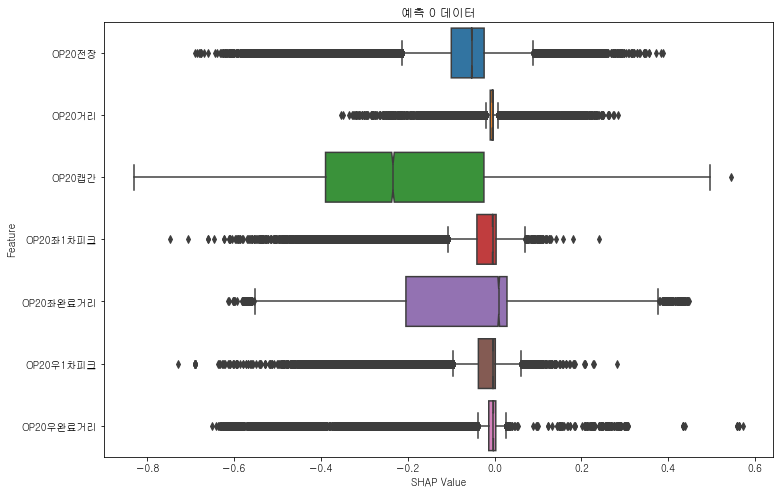

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
# 폰트 설정
font_location = 'C:/Windows/Fonts/NGULIM.ttf'  # 올바른 폰트 파일의 경로로 수정하세요
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(12, 8))
sns.boxplot(data=shap_values_df_only, orient='h', notch=True)
plt.title('예측 0 데이터')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

# 예측=0, 상/하한에 걸리지 않은 데이터

In [45]:
result_0_filtered = result_0.drop('OP40판정', axis=1)
result_0_filtered = result_0_filtered.drop('pred', axis=1)

result_0_filtered

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
365221,119.427285,-0.05,38.718569,375.612316,10.350000,323.251862,10.260000
298091,116.352173,-0.05,38.669030,357.218722,10.350000,346.710911,10.261369
196935,117.391748,-0.05,38.551783,360.623843,10.351132,341.416487,10.260000
310418,116.520067,-0.05,38.502698,365.308507,10.350000,421.262786,10.260000
313439,116.883805,-0.05,38.453576,455.912394,10.350020,478.871129,10.260000
...,...,...,...,...,...,...,...
301762,116.954562,-0.05,38.563403,400.440606,10.350000,397.291534,10.260000
353081,116.340427,-0.05,38.603047,358.288447,10.350000,378.156000,10.260000
278609,119.003274,-0.05,38.706036,416.630460,10.350000,333.725402,10.260000
279962,116.881504,-0.05,38.600816,398.857019,10.350000,435.927312,10.261331


In [46]:
result_0_filtered = result_0_filtered[-125 < result_0_filtered['OP20전장']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20전장'] < 125]

result_0_filtered = result_0_filtered[-0.15 < result_0_filtered['OP20거리']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20거리'] < 0.15]

result_0_filtered = result_0_filtered[38.4 < result_0_filtered['OP20캡간']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20캡간'] < 39]

result_0_filtered = result_0_filtered[150 < result_0_filtered['OP20좌1차피크']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20좌1차피크'] < 600]

result_0_filtered = result_0_filtered[9.5 < result_0_filtered['OP20좌완료거리']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20좌완료거리'] < 11.5]

result_0_filtered = result_0_filtered[150 < result_0_filtered['OP20우1차피크']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20우1차피크'] < 600]

result_0_filtered = result_0_filtered[9.5 < result_0_filtered['OP20우완료거리']]
result_0_filtered = result_0_filtered[result_0_filtered['OP20우완료거리'] < 11.5]

In [47]:
result_0_filtered

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
365221,119.427285,-0.05,38.718569,375.612316,10.350000,323.251862,10.260000
298091,116.352173,-0.05,38.669030,357.218722,10.350000,346.710911,10.261369
196935,117.391748,-0.05,38.551783,360.623843,10.351132,341.416487,10.260000
310418,116.520067,-0.05,38.502698,365.308507,10.350000,421.262786,10.260000
313439,116.883805,-0.05,38.453576,455.912394,10.350020,478.871129,10.260000
...,...,...,...,...,...,...,...
301762,116.954562,-0.05,38.563403,400.440606,10.350000,397.291534,10.260000
353081,116.340427,-0.05,38.603047,358.288447,10.350000,378.156000,10.260000
278609,119.003274,-0.05,38.706036,416.630460,10.350000,333.725402,10.260000
279962,116.881504,-0.05,38.600816,398.857019,10.350000,435.927312,10.261331


In [48]:
# 모델을 사용하여 TreeExplainer 생성
explainer = shap.TreeExplainer(model)

# 모든 샘플에 대한 SHAP 값을 계산
shap_values_filtered = explainer.shap_values(result_0_filtered, approximate=True)

# 이진 분류인 경우 클래스 1에 대한 SHAP 값 선택
shap_values_class1 = shap_values_filtered[1]

# SHAP 값을 담을 데이터프레임 생성
shap_values_df_filtered = pd.DataFrame(shap_values_class1, columns=result_0_filtered.columns)

# 데이터프레임 출력
print(shap_values_df_filtered)

         OP20전장    OP20거리    OP20캡간  OP20좌1차피크  OP20좌완료거리  OP20우1차피크  \
0     -0.107502 -0.014297 -0.398860   0.019615   0.030858  -0.031641   
1     -0.006429 -0.008047 -0.265601  -0.001057   0.017208   0.006086   
2     -0.035047 -0.003386 -0.257271   0.002938  -0.200369   0.001710   
3     -0.277529  0.001544 -0.072064  -0.079546   0.015923  -0.109796   
4     -0.036163  0.000554 -0.083192  -0.005188  -0.358163  -0.028067   
...         ...       ...       ...        ...        ...        ...   
37466 -0.091592 -0.004008 -0.389722  -0.005364   0.005261   0.000401   
37467 -0.080441 -0.009837 -0.383966  -0.027335   0.024219   0.000882   
37468 -0.081343 -0.014672 -0.374875  -0.015301   0.031568  -0.047053   
37469 -0.052730 -0.003628 -0.206038   0.001396   0.002098  -0.000562   
37470 -0.557186  0.002270  0.261647   0.087686   0.029269  -0.163035   

       OP20우완료거리  
0       0.002153  
1      -0.241834  
2      -0.008247  
3       0.021795  
4       0.010546  
...          ...  
37

In [49]:
shap_values_df_filtered.describe()

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
count,37471.000000,37471.000000,37471.000000,37471.000000,37471.000000,37471.000000,37471.000000
mean,-0.077628,-0.009417,-0.199271,-0.042193,-0.066194,-0.042421,-0.038259
std,0.120761,0.031240,0.221329,0.091774,0.156551,0.091881,0.114624
min,-0.689386,-0.353982,-0.829944,-0.746438,-0.612720,-0.728676,-0.649990
25%,-0.099829,-0.009962,-0.389727,-0.039145,-0.204407,-0.036672,-0.013361
50%,-0.052395,-0.004698,-0.233994,-0.004255,0.009679,-0.003470,-0.002786
75%,-0.024028,-0.003223,-0.022191,0.003590,0.028632,0.001703,0.002799
max,0.388280,0.283438,0.545476,0.239698,0.448698,0.280892,0.571779


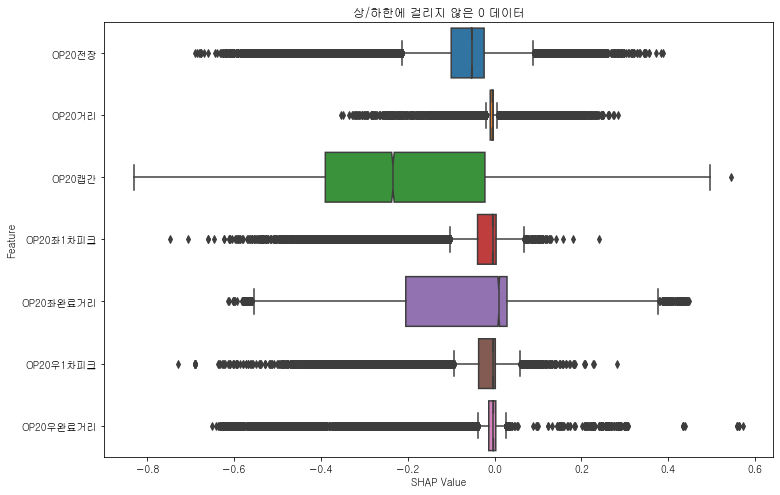

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=shap_values_df_filtered, orient='h', notch=True)
plt.title('상/하한에 걸리지 않은 0 데이터')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

## 전체 데이터로 확인해보기

In [51]:
# 모델을 사용하여 TreeExplainer 생성
explainer = shap.TreeExplainer(model)

# 모든 샘플에 대한 SHAP 값을 계산
shap_values = explainer.shap_values(result, approximate=True)

# 이진 분류인 경우 클래스 1에 대한 SHAP 값 선택
shap_values_class1 = shap_values[1]

# SHAP 값을 담을 데이터프레임 생성
shap_values_df_all = pd.DataFrame(shap_values_class1, columns=result.columns)

# 데이터프레임 출력
print(shap_values_df_all)

         OP20전장    OP20거리    OP20캡간  OP20좌1차피크  OP20좌완료거리  OP20우1차피크  \
0      0.029278 -0.000190  0.278389   0.034795   0.022219  -0.191753   
1      0.035192 -0.002827  0.249234   0.092883   0.027192   0.055693   
2     -0.107502 -0.014297 -0.398860   0.019615   0.030858  -0.031641   
3      0.257978 -0.004139 -0.057002   0.056784   0.051972  -0.029747   
4      0.293949 -0.037232  0.055580   0.061484   0.065313   0.048579   
...         ...       ...       ...        ...        ...        ...   
76725 -0.081343 -0.014672 -0.374875  -0.015301   0.031568  -0.047053   
76726 -0.052730 -0.003628 -0.206038   0.001396   0.002098  -0.000562   
76727 -0.557186  0.002270  0.261647   0.087686   0.029269  -0.163035   
76728 -0.003494 -0.001927  0.230512  -0.007780   0.002959   0.044599   
76729  0.091991  0.007640  0.218448  -0.140391   0.024212  -0.202660   

       OP20우완료거리  OP40판정  pred  
0       0.012589     0.0   0.0  
1       0.031960     0.0   0.0  
2       0.002153     0.0   0.0  
3  

In [52]:
shap_values_df_all.describe()

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40판정,pred
count,76730.000000,76730.000000,76730.000000,76730.000000,76730.000000,76730.000000,76730.000000,76730.0,76730.0
mean,0.001469,-0.000070,0.001415,-0.001769,0.000532,-0.002207,-0.000161,0.0,0.0
std,0.135474,0.045227,0.267841,0.092085,0.143223,0.092471,0.105197,0.0,0.0
min,-0.689386,-0.353982,-0.829944,-0.746438,-0.612720,-0.728676,-0.649990,0.0,0.0
25%,-0.056414,-0.009127,-0.231280,-0.014685,0.006373,-0.017268,-0.003565,0.0,0.0
50%,-0.013732,-0.003630,0.076491,0.003470,0.024784,0.001500,0.002582,0.0,0.0
75%,0.075628,-0.001659,0.229517,0.028488,0.031836,0.033358,0.017404,0.0,0.0
max,0.460211,0.355011,0.589871,0.520506,0.478220,0.485821,0.641642,0.0,0.0


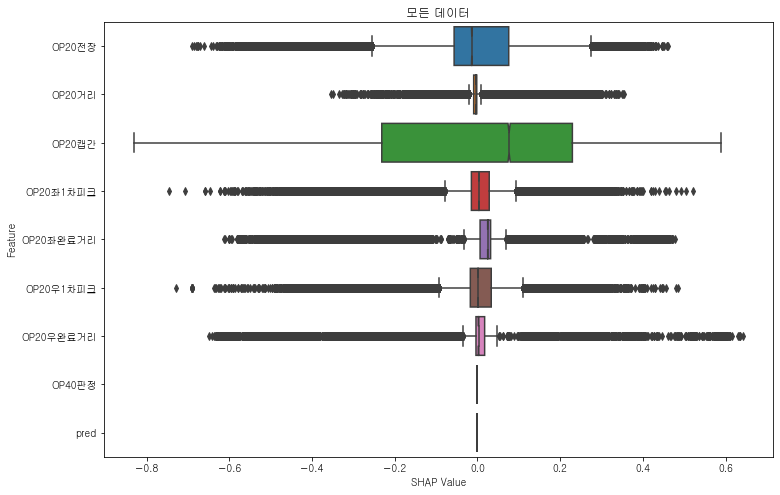

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=shap_values_df_all, orient='h', notch=True)
plt.title('모든 데이터')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
# 피처 값과 SHAP 값 간의 관계 시각화
def plot_shap_relationship(feature, sample_df, shap_values_df):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=sample_df[feature], y=shap_values_df[feature])
    plt.xlabel(f"{feature} value")
    plt.ylabel(f"{feature} SHAP value")
    plt.title(f"Relationship between {feature} value and SHAP value")
    plt.show()

# 주요 피처의 관계 시각화
for feature in result_0.columns[:-2]:  # 'pred' 제외
    plot_shap_relationship(feature, result_0, shap_values_df)

In [58]:
x_test = x_test.drop('OP40판정', axis=1)
x_test = x_test.drop('pred', axis=1)

In [59]:
x_test

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
78757,0.000000,-0.05,38.448000,341.173000,10.35,332.494000,10.260000
62010,116.892000,-0.05,38.508000,376.184000,10.35,406.264000,10.260000
365221,119.427285,-0.05,38.718569,375.612316,10.35,323.251862,10.260000
113128,119.458000,-0.05,38.558000,413.562000,10.35,460.407000,10.260000
20237,0.000000,-0.05,38.808000,428.059000,10.35,430.722000,10.260000
...,...,...,...,...,...,...,...
278609,119.003274,-0.05,38.706036,416.630460,10.35,333.725402,10.260000
279962,116.881504,-0.05,38.600816,398.857019,10.35,435.927312,10.261331
230033,116.814608,-0.05,38.508000,421.066712,10.35,440.331473,10.260000
96087,117.200000,-0.05,38.444000,442.359000,10.35,362.179000,10.263000


# PDP써보기

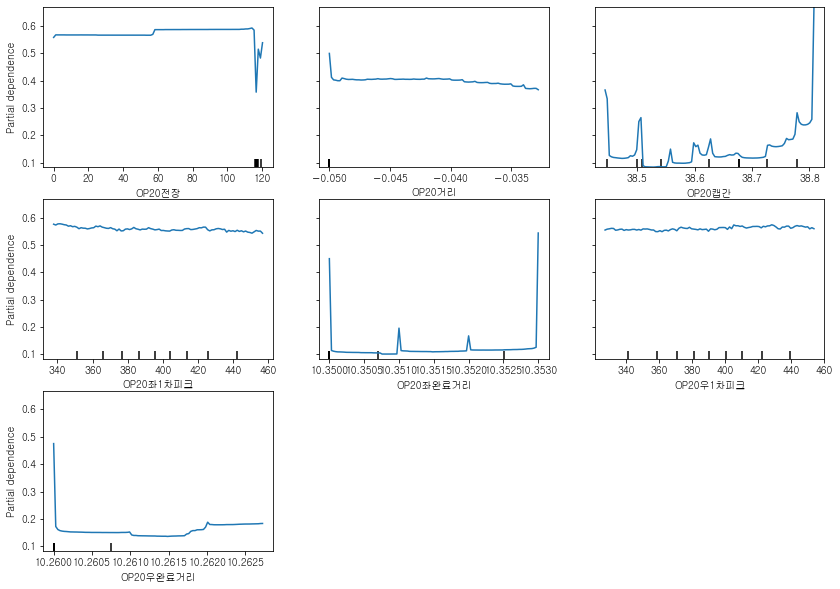

In [60]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt

# 모델과 데이터프레임 준비
# 모델이 이미 학습되었다고 가정

# PDP 시각화
features = ['OP20전장', 'OP20거리', 'OP20캡간', 'OP20좌1차피크', 'OP20좌완료거리', 'OP20우1차피크', 'OP20우완료거리']

# PDP 시각화 크기 조정
fig, ax = plt.subplots(figsize=(14, 10))
PartialDependenceDisplay.from_estimator(model, x_test, features, ax=ax)
plt.show()


In [61]:
def plot_ice(model, X, feature, samples=10):
    # 부분 의존성 계산
    pdp_results = partial_dependence(model, X, [feature], kind='individual', grid_resolution=50)
    
    # ICE 값과 피처 값 추출
    ice_values = pdp_results['individual'][0]
    feature_values = pdp_results['values'][0]

    # ICE 플롯 시각화
    plt.figure(figsize=(10, 6))
    for sample in range(min(samples, len(ice_values))):
        plt.plot(feature_values, ice_values[sample], alpha=0.5, label=f'Sample {sample+1}')
    
    plt.xlabel(feature)
    plt.ylabel('Prediction')
    plt.title(f'ICE Plot for {feature}')
    
    # x축 눈금 설정
    plt.xticks(np.arange(min(feature_values), max(feature_values), (max(feature_values)-min(feature_values))/10))
    # x축 범위 설정
    plt.xlim([min(feature_values), max(feature_values)])
    
    plt.show()

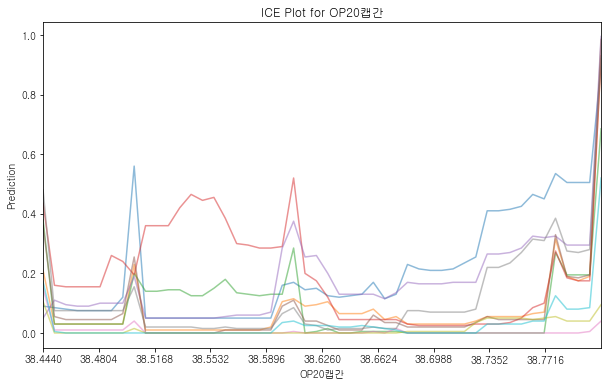

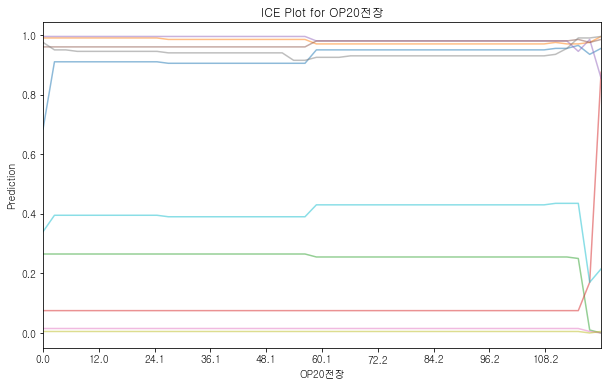

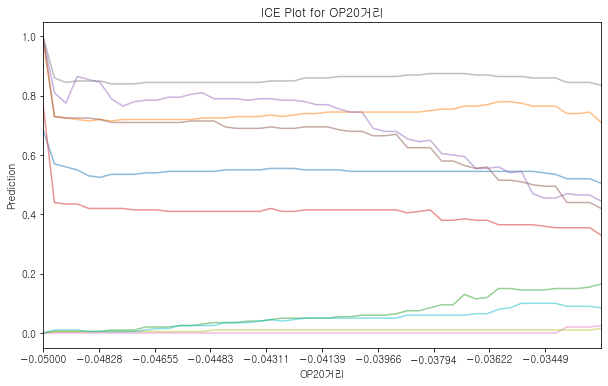

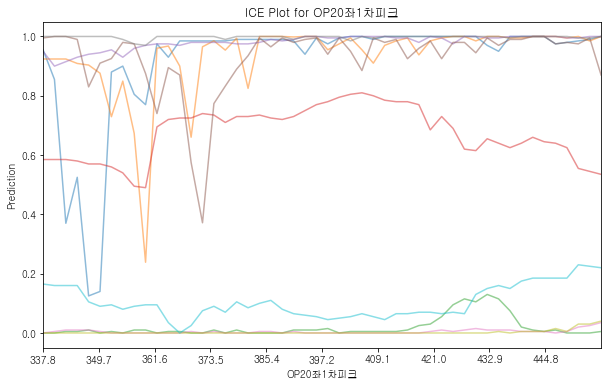

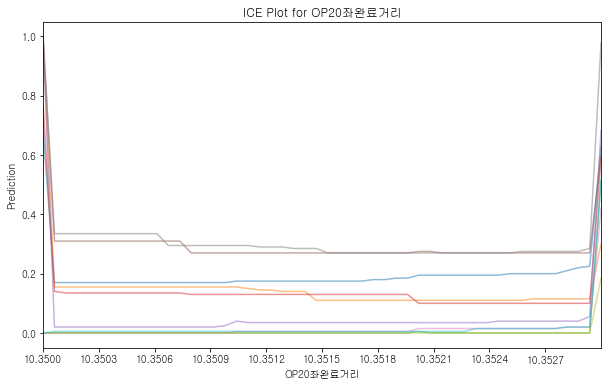

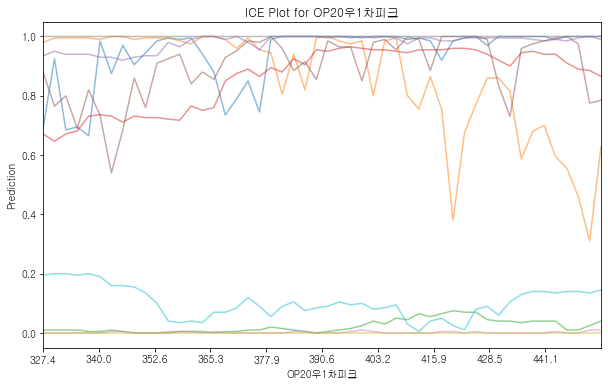

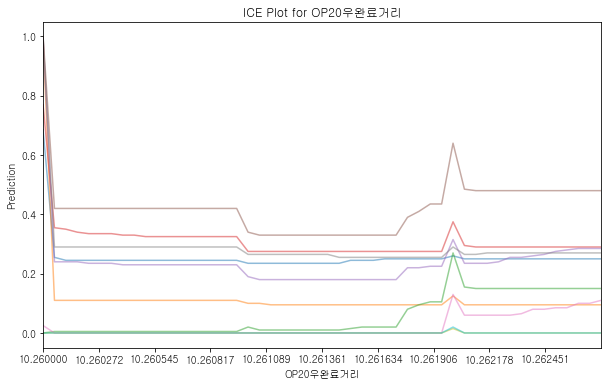

In [62]:
plot_ice(model, x_test, 'OP20캡간')
plot_ice(model, x_test, 'OP20전장')
plot_ice(model, x_test, 'OP20거리')
plot_ice(model, x_test, 'OP20좌1차피크')
plot_ice(model, x_test, 'OP20좌완료거리')
plot_ice(model, x_test, 'OP20우1차피크')
plot_ice(model, x_test, 'OP20우완료거리')

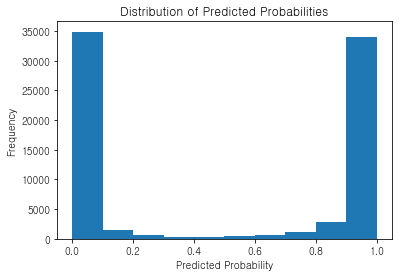

In [64]:
# 모델 예측 확률 확인
probs = model.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 예측 확률
plt.hist(probs, bins=10)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [66]:
shap_values_df_only

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리
0,-0.107502,-0.014297,-0.398860,0.019615,0.030858,-0.031641,0.002153
1,-0.006429,-0.008047,-0.265601,-0.001057,0.017208,0.006086,-0.241834
2,-0.035047,-0.003386,-0.257271,0.002938,-0.200369,0.001710,-0.008247
3,-0.277529,0.001544,-0.072064,-0.079546,0.015923,-0.109796,0.021795
4,-0.036163,0.000554,-0.083192,-0.005188,-0.358163,-0.028067,0.010546
...,...,...,...,...,...,...,...
37737,-0.091592,-0.004008,-0.389722,-0.005364,0.005261,0.000401,-0.014650
37738,-0.080441,-0.009837,-0.383966,-0.027335,0.024219,0.000882,-0.013195
37739,-0.081343,-0.014672,-0.374875,-0.015301,0.031568,-0.047053,0.002002
37740,-0.052730,-0.003628,-0.206038,0.001396,0.002098,-0.000562,-0.240209


In [67]:
# 각 행의 최솟값을 갖는 칼럼의 갯수를 계산하는 함수
min_count_by_column = shap_values_df_only.apply(lambda row: (row == row.min()), axis=1).sum()


print(min_count_by_column)

OP20전장        3825
OP20거리         123
OP20캡간       20076
OP20좌1차피크     2125
OP20좌완료거리     7180
OP20우1차피크     2039
OP20우완료거리     2374
dtype: int64


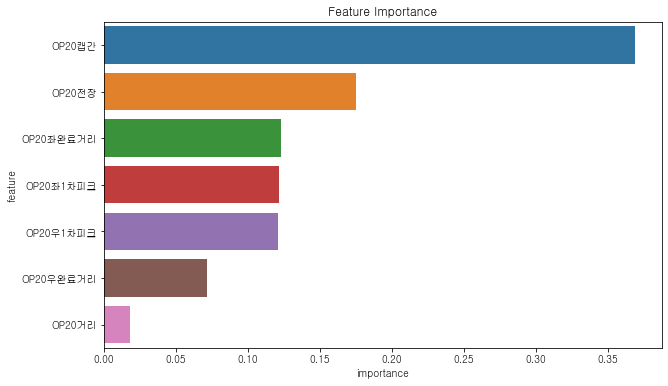

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns


# 피처 중요도 추출
feature_importance = model.feature_importances_

# 피처 중요도 시각화
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importance})
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.sort_values(by='importance', ascending=False))
plt.title('Feature Importance')
plt.show()


In [74]:
df_new = x_resampled
df_new['OP40S판정'] = y_resampled
df_new

,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,114.943000,-0.049000,38.858000,376.184000,10.35,400.346000,10.260000,1
1,114.840000,-0.024000,38.858000,347.386000,10.35,406.066000,10.260000,1
2,114.635000,-0.032000,38.858000,400.149000,10.35,438.908000,10.260000,1
3,115.148000,-0.022000,38.858000,399.360000,10.35,372.633000,10.260000,1
4,114.943000,-0.043000,38.858000,359.221000,10.35,364.941000,10.260000,1
...,...,...,...,...,...,...,...,...
383643,117.406000,-0.050000,38.688701,398.915784,10.35,381.569703,10.260000,0
383644,116.457850,-0.050000,38.814642,435.543843,10.35,387.832157,10.259424,0
383645,116.277000,-0.039735,38.506717,439.168192,10.35,434.841019,10.260000,0
383646,116.105900,-0.050000,38.513400,338.129800,10.35,376.828640,10.260000,0


# Counterfactual Explantation

In [92]:
import dice_ml
from dice_ml.utils import helpers

# 데이터셋 로드 및 모델 준비
data_dice = dice_ml.Data(dataframe=df_new, continuous_features=['OP20전장', 'OP20거리', 'OP20캡간', 'OP20좌1차피크', 'OP20좌완료거리', 'OP20우1차피크', 'OP20우완료거리'], outcome_name='OP40S판정')
model_dice = dice_ml.Model(model=model, backend="sklearn")

# Dice 설명자 생성
explainer = dice_ml.Dice(data_dice, model_dice, method='random')

In [93]:
# 예측 결과가 1인 데이터 포인트 찾기
query_instances = x[y == 0]

# Counterfactual Explanations 생성 및 시각화
for i in range(min(len(query_instances), 5)):  # 최대 5개의 데이터 포인트에 대해 생성
    query_instance = query_instances.iloc[[i]]
    cf = explainer.generate_counterfactuals(query_instance, total_CFs=5, desired_class="opposite")
    print(f"Counterfactual Explanations for instance {i}:")
    display(cf.visualize_as_dataframe(show_only_changes=True))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


Counterfactual Explanations for instance 0:
Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,115.044998,-0.036,38.858002,387.328003,10.35,288.015015,10.26,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,88.2,-,-,-,-,1641.88,-,1.0
1,-,-,-,211.382,-,-,0.42,1.0
2,-,20.36,-,680.599,-,-,-,1.0
3,-,22.25,-,-,-,1122.47,-,1.0
4,87.9,-,18.83,-,-,-,-,1.0


None

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


Counterfactual Explanations for instance 1:
Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,114.429001,-0.029,38.858002,360.996002,10.35,373.619995,10.26,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,-,-,12.595,-,-,-,-,1.0
1,-,31.1,-,-,-,-,-,1.0
2,-,-,1.045,1358.171,-,-,-,1.0
3,8.9,-,26.408,-,-,-,-,1.0
4,-,-,26.112,-,-,-,-,1.0


None

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


Counterfactual Explanations for instance 2:
Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,114.839996,-0.044,38.858002,362.377014,10.35,304.484985,10.26,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,-,-,-,-,4.5,658.75,-,1.0
1,-,19.24,5.532,-,-,-,-,1.0
2,-,-,-,-,7.79,1338.87,-,1.0
3,104.6,-,-,-,-,1424.14,-,1.0
4,-,-,4.521,-,-,-,-,1.0


None

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.14s/it]


Counterfactual Explanations for instance 3:
Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,114.943001,-0.028,38.858002,350.739014,10.35,332.592987,10.26,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,-,-,-,-,-,1725.65,-,1.0
1,52.3,-,-,75.926,-,-,-,1.0
2,42.3,-,2.057,-,-,-,-,1.0
3,-,-,9.185,2296.528,-,-,-,1.0
4,-,12.77,-,-,-,-,-,1.0


None

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.24s/it]


Counterfactual Explanations for instance 4:
Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,114.839996,-0.048,38.858002,373.619995,10.35,340.187012,10.26,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,-,-,-,406.888,-,-,-,1.0
1,-,-,-,-,-,743.13,-,1.0
2,1.7,-,-,-,-,-,-,1.0
3,-,-,20.066,-,-,-,5.82,1.0
4,-,-,-,1838.267,-,-,-,-


None

In [85]:
new_data = {
    'OP20전장': [np.random.uniform(100, 120)],
    'OP20거리': [np.random.uniform(-0.1, 0)],
    'OP20캡간': [np.random.uniform(38, 39)],
    'OP20좌1차피크': [np.random.uniform(350, 450)],
    'OP20좌완료거리': [np.random.uniform(10, 11)],
    'OP20우1차피크': [np.random.uniform(300, 500)],
    'OP20우완료거리': [np.random.uniform(10, 11)],
}

new_data_df = pd.DataFrame(new_data)


In [88]:
cf = explainer.generate_counterfactuals((new_data_df), total_CFs=5, desired_class="opposite")
cf_df = cf.visualize_as_dataframe(show_only_changes=True)

# Counterfactual Explanations 출력
print("Counterfactual Explanations for the new data point:")
display(cf_df)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


Query instance (original outcome : 0)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,108.556709,-0.028491,38.871876,374.812714,10.284135,315.672943,10.379696,0



Diverse Counterfactual set (new outcome: 1)


,OP20전장,OP20거리,OP20캡간,OP20좌1차피크,OP20좌완료거리,OP20우1차피크,OP20우완료거리,OP40S판정
0,-,-,-,-,-,1728.07,0.91,1.0
1,-,30.39,-,-,-,-,5.06,1.0
2,-,6.61,-,-,-,335.87,-,1.0
3,-,-,-,-,-,559.72,-,1.0
4,104.1,-,-,-,-,736.04,-,1.0


Counterfactual Explanations for the new data point:


None

In [89]:
data_dice